# **1- Data Loading and Initial Exploration**

Using data-profiling tool for Analysis


In [185]:
pip install ydata-profiling

**Load Data**

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

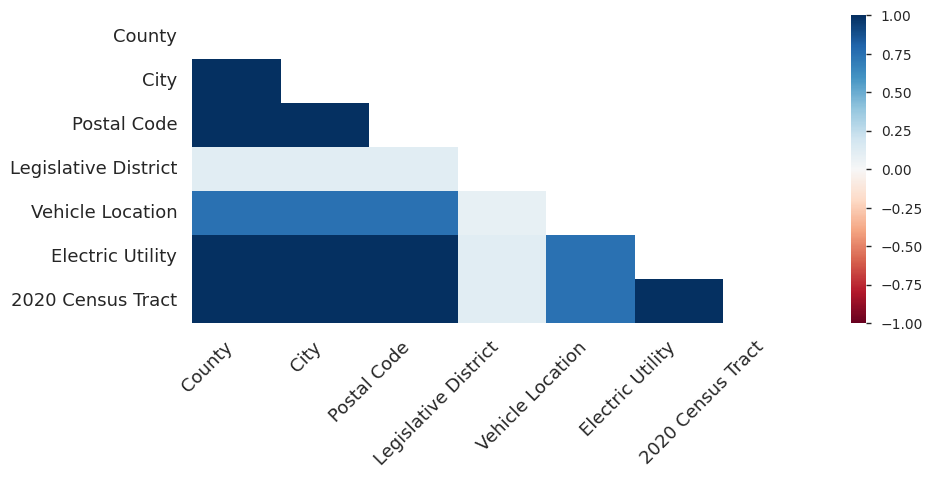

In [186]:
from ydata_profiling import ProfileReport
df = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')
ProfileReport(df)

**Librarys import**

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from branca.colormap import LinearColormap
import matplotlib
import folium
import plotly.express as px

**Snapshot of the dataset**

In [188]:
df.head()

VIN (1-10)     County       City State  Postal Code  Model Year   Make  \
0  5YJYGDEE1L       King    Seattle    WA      98122.0        2020  TESLA   
1  7SAYGDEE9P  Snohomish    Bothell    WA      98021.0        2023  TESLA   
2  5YJSA1E4XK       King    Seattle    WA      98109.0        2019  TESLA   
3  5YJSA1E27G       King   Issaquah    WA      98027.0        2016  TESLA   
4  5YJYGDEE5M     Kitsap  Suquamish    WA      98392.0        2021  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL Y  Battery Electric Vehicle (BEV)   
1  MODEL Y  Battery Electric Vehicle (BEV)   
2  MODEL S  Battery Electric Vehicle (BEV)   
3  MODEL S  Battery Electric Vehicle (BEV)   
4  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle Eligible             270   
3            Clean Alternative Fuel Vehicle Eligible             210   
4  Eligibility unknown as battery range has not b...               0   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  37.0       125701579   
1          0                   1.0       244285107   
2          0                  36.0       156773144   
3          0                   5.0       165103011   
4          0                  23.0       205138552   

                Vehicle Location  \
0   POINT (-122.30839 47.610365)   
1  POINT (-122.179458 47.802589)   
2   POINT (-122.34848 47.632405)   
3   POINT (-122.03646 47.534065)   
4   POINT (-122.55717 47.733415)   

                                Electric Utility  2020 Census Tract  
0   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10  
1                         PUGET SOUND ENERGY INC       5.306105e+10  
2   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)       5.303301e+10  
3  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)       5.303303e+10  
4                         PUGET SOUND ENERGY INC       5.303594e+10

**dataset summary**

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [190]:
df.describe()

Postal Code     Model Year  Electric Range      Base MSRP  \
count  177861.000000  177866.000000   177866.000000  177866.000000   
mean    98172.453506    2020.515512       58.842162    1073.109363   
std      2442.450668       2.989384       91.981298    8358.624956   
min      1545.000000    1997.000000        0.000000       0.000000   
25%     98052.000000    2019.000000        0.000000       0.000000   
50%     98122.000000    2022.000000        0.000000       0.000000   
75%     98370.000000    2023.000000       75.000000       0.000000   
max     99577.000000    2024.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         177477.000000    1.778660e+05       1.778610e+05  
mean              29.127481    2.202313e+08       5.297672e+10  
std               14.892169    7.584987e+07       1.578047e+09  
min                1.000000    4.385000e+03       1.001020e+09  
25%               18.000000    1.814743e+08       5.303301e+10  
50%               33.000000    2.282522e+08       5.303303e+10  
75%               42.000000    2.548445e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.603300e+10

In [191]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [192]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming you have already loaded the electric vehicle dataset into a DataFrame called 'df'

# Detect numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Print the feature names
print("Features:")
for feature in numerical_columns:
    print(feature)


Features:
Postal Code
Model Year
Electric Range
Base MSRP
Legislative District
DOL Vehicle ID
2020 Census Tract


# **2- Data Cleaning**

In [193]:
df.isnull().sum()


VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

**delet the missing data column (we do not need it already)**

In [194]:
df.drop(columns=['Legislative District'], inplace=True)

df.dropna(inplace=True)

In [195]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

**delete unwanted columns**

In [196]:
df.drop(columns=['Postal Code','County','2020 Census Tract','Vehicle Location'], inplace=True)

df.dropna(inplace=True)

**handel duplicate rows**

In [197]:
print('Number of rows before:', len(df))

df = df.drop_duplicates('VIN (1-10)', keep='first')

print('Number of rows after:', len(df))

Number of rows before: 177857
Number of rows after: 10829


**Dataset after**

In [198]:
df

VIN (1-10)  Model Year    Make           Model  \
0       5YJYGDEE1L        2020   TESLA         MODEL Y   
1       7SAYGDEE9P        2023   TESLA         MODEL Y   
2       5YJSA1E4XK        2019   TESLA         MODEL S   
3       5YJSA1E27G        2016   TESLA         MODEL S   
4       5YJYGDEE5M        2021   TESLA         MODEL Y   
...            ...         ...     ...             ...   
177572  SADHC2S17K        2019  JAGUAR          I-PACE   
177604  7JRH60FM3R        2024   VOLVO             S60   
177676  YV4BR00Z6N        2022   VOLVO            XC90   
177731  1C4RJYE62P        2023    JEEP  GRAND CHEROKEE   
177784  WMEFK9BA7J        2018   SMART       EQ FORTWO   

                         Electric Vehicle Type  \
0               Battery Electric Vehicle (BEV)   
1               Battery Electric Vehicle (BEV)   
2               Battery Electric Vehicle (BEV)   
3               Battery Electric Vehicle (BEV)   
4               Battery Electric Vehicle (BEV)   
...                                        ...   
177572          Battery Electric Vehicle (BEV)   
177604  Plug-in Hybrid Electric Vehicle (PHEV)   
177676  Plug-in Hybrid Electric Vehicle (PHEV)   
177731  Plug-in Hybrid Electric Vehicle (PHEV)   
177784          Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clean Alternative Fuel Vehicle Eligible             291   
1       Eligibility unknown as battery range has not b...               0   
2                 Clean Alternative Fuel Vehicle Eligible             270   
3                 Clean Alternative Fuel Vehicle Eligible             210   
4       Eligibility unknown as battery range has not b...               0   
...                                                   ...             ...   
177572            Clean Alternative Fuel Vehicle Eligible             234   
177604            Clean Alternative Fuel Vehicle Eligible              41   
177676              Not eligible due to low battery range              18   
177731              Not eligible due to low battery range              25   
177784            Clean Alternative Fuel Vehicle Eligible              58   

        Base MSRP  DOL Vehicle ID  \
0               0       125701579   
1               0       244285107   
2               0       156773144   
3               0       165103011   
4               0       205138552   
...           ...             ...   
177572          0       100919759   
177604          0       260588590   
177676          0       195571141   
177731          0       252425953   
177784          0       140147836   

                                         Electric Utility  
0            CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)  
1                                  PUGET SOUND ENERGY INC  
2            CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)  
3           PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)  
4                                  PUGET SOUND ENERGY INC  
...                                                   ...  
177572                             PUGET SOUND ENERGY INC  
177604  BONNEVILLE POWER ADMINISTRATION||CITY OF RICHL...  
177676  BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...  
177731                           PUD NO 2 OF GRANT COUNTY  
177784                             PUGET SOUND ENERGY INC  

[10829 rows x 10 columns]

# **3- Exploratory Data Analysis**

**Negative correlation**

this numerical columns which we focus on the most ,shows no correlation so no need for PCA

In [199]:
# Statistical Analysis
correlation = df['Model Year'].corr(df['Electric Range'])
print("Correlation coefficient: ", correlation)

Correlation coefficient:  -0.4288576448291079


**Growth direction**




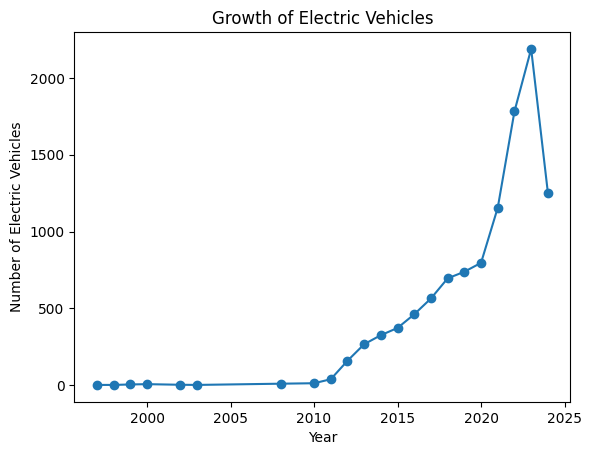

In [200]:
ev_df = df[df['Electric Vehicle Type'].str.contains('Electric')]

ev_growth = ev_df['Model Year'].value_counts().sort_index()

plt.plot(ev_growth.index, ev_growth.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Electric Vehicles')
plt.title('Growth of Electric Vehicles')
plt.show()


**Number of Electric Vehicles by years**

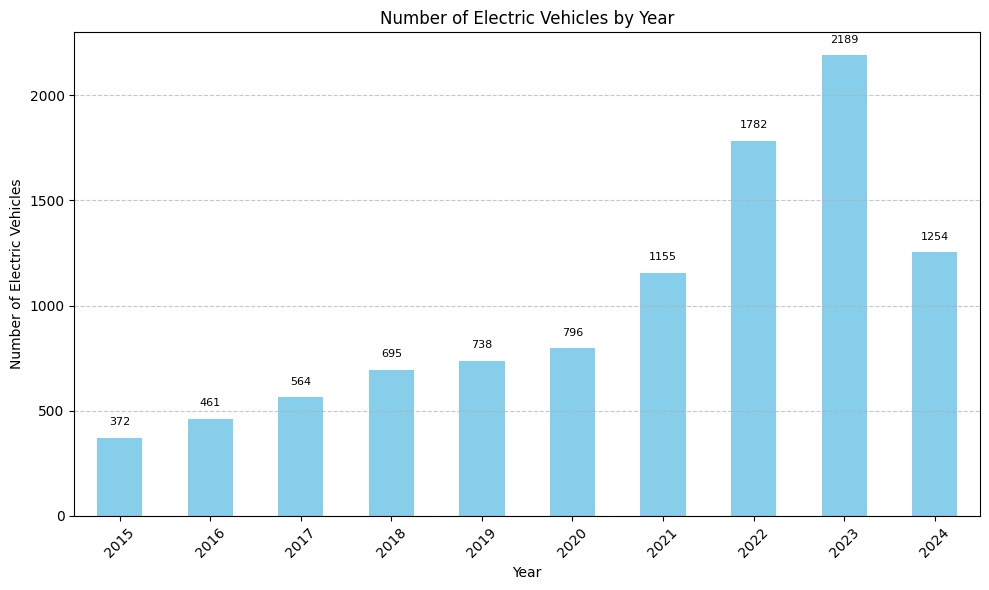

In [201]:
ev_by_year = df.groupby('Model Year').size()

ev_by_year = ev_by_year.reindex(range(2015, ev_by_year.index.max() + 1), fill_value=0)


plt.figure(figsize=(10, 6))
bars = ev_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Electric Vehicles by Year')
plt.xlabel('Year')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 50,
             f'{int(bar.get_height())}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

**Number of each model tybe by 2023**

In [202]:
n_df = df[df['Model Year'] == 2023]
ev_ModelYear_n = n_df['Model'].value_counts()

ev_ModelYear_n

Model
MUSTANG MACH-E       136
ID.4                 103
XC60                  77
XC90                  68
Q4                    67
                    ... 
V60                    7
I-PACE                 4
RANGE ROVER SPORT      4
RANGE ROVER            3
S90                    1
Name: count, Length: 74, dtype: int64

**Distribution of Electric Vehicle Types**

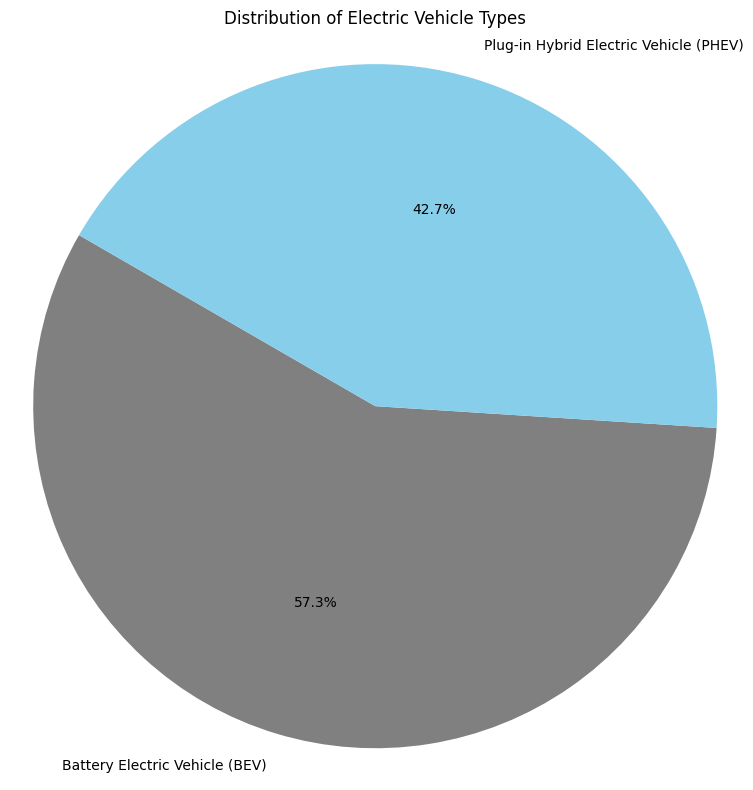

In [204]:
df_EV_type = df["Electric Vehicle Type"].value_counts()

plt.figure(figsize=(8, 8))
df_EV_type.plot(kind='pie', autopct='%1.1f%%', startangle=150, colors=['gray', 'skyblue'])
plt.title('Distribution of Electric Vehicle Types')
plt.ylabel('')
plt.axis('equal')
plt.tight_layout()
plt.show()

**Vehicle Efficiency info**

In [203]:
fig = px.scatter(df, x='Model Year', y='Electric Range', hover_data=['Make', 'Electric Vehicle Type'], title='Vehicle Efficiency vs. Model Year')
fig.show()

**Top 10 Makes (Electric Range and Number of Electric Vehicles)**


In [205]:
# electric range bins
electric_range_bins = pd.cut(df['Electric Range'], bins=[0, 100, 200, 300, 400, float('inf')], labels=['<100', '100-200', '200-300', '300-400', '400+'])

# combining electric range bins and make
ev_by_range_make = pd.concat([electric_range_bins, df['Make']], axis=1)
ev_by_range_make.columns = ['Electric Range Bin', 'Make']

# Count electric vehicles by electric range bin and make
ev_by_range_make_counts = ev_by_range_make.groupby(['Electric Range Bin', 'Make']).size().unstack(fill_value=0)

# Select the top 10 makes with the highest total count
top_10_makes = ev_by_range_make_counts.sum().nlargest(10).index
ev_by_range_make_counts_top_10 = ev_by_range_make_counts[top_10_makes]

# Reset index to use Electric Range Bin as a column
ev_by_range_make_counts_top_10 = ev_by_range_make_counts_top_10.reset_index()

# Create an interactive stacked bar chart using plotly
fig = px.bar(ev_by_range_make_counts_top_10,
             x='Electric Range Bin',
             y=top_10_makes,
             title='Number of Electric Vehicles by Electric Range and Top 10 Makes',
             barmode='stack',
             labels={'Electric Range Bin': 'Electric Range (miles)',
                     'value': 'Number of Electric Vehicles',
                     'variable': 'Make'})

# Customize hover information
fig.update_traces(hovertemplate='Electric Range: %{x}<br>' +
                                'Number of Electric Vehicles: %{y}<br>'
                                  )

# Show the interactive plot
fig.show()

<ipython-input-205-fc97c7fa43c4>:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1992: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



**Comparison of Electric Vehicle (EV) and Non-Electric Vehicle (Non-EV) Sales**

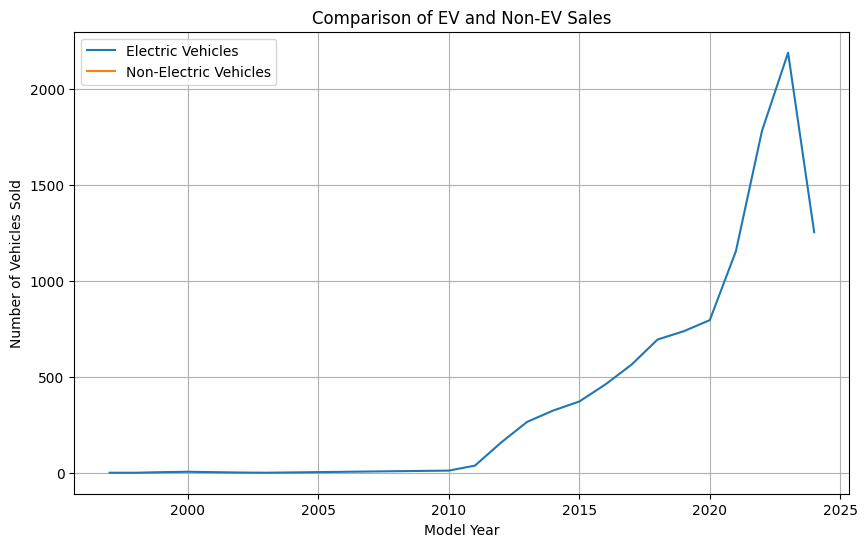

In [206]:
ev_sales = df[df['Electric Vehicle Type'].str.contains('Electric')].groupby('Model Year').size()
non_ev_sales = df[~df['Electric Vehicle Type'].str.contains('Electric')].groupby('Model Year').size()

plt.figure(figsize=(10, 6))
ev_sales.plot(label='Electric Vehicles')
non_ev_sales.plot(label='Non-Electric Vehicles')
plt.title('Comparison of EV and Non-EV Sales')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Sold')
plt.legend()
plt.grid()
plt.show()

#**4- Feature Engineering**


**Creating a Price_Range_Category Column**

In [211]:
df['Base MSRP'].value_counts()

Base MSRP
0         10266
69900       126
52900        75
59900        41
39995        30
64950        25
32250        22
31950        22
44100        21
33950        21
75095        11
36800        11
36900        11
52650        11
34995        11
54950        11
55700        11
90700        10
45600        10
110950       10
53400        10
81100        10
98950         9
184400        9
89100         8
102000        8
109000        6
43700         6
91250         4
32995         2
845000        1
Name: count, dtype: int64

In [212]:
def create_price_range_category(df, column='Base MSRP'):
    def categorize_price(price):
        if price == 0:
            return "Unknown"
        elif price < 40000:
            return "Low"
        elif price < 60000:
            return "Medium"
        else:
            return "High"

    df['Price_Range_Category'] = df[column].apply(categorize_price)
    return df

df = create_price_range_category(df, column='Base MSRP')

<ipython-input-212-a7256c24efde>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [213]:
def create_electric_range_category(df, column='Electric Range'):
    def categorize_range(electric_range):
        if electric_range == 0:
            return "Unknown"
        elif electric_range < 150:
            return "Short"
        elif electric_range < 300:
            return "Medium"
        else:
            return "Long"

    df['Electric_Range_Category'] = df[column].apply(categorize_range)
    return df

df = create_electric_range_category(df, column='Electric Range')

<ipython-input-213-41e3062efe4c>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [214]:
display(df.head())

VIN (1-10)  Model Year   Make    Model           Electric Vehicle Type  \
0  5YJYGDEE1L        2020  TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
1  7SAYGDEE9P        2023  TESLA  MODEL Y  Battery Electric Vehicle (BEV)   
2  5YJSA1E4XK        2019  TESLA  MODEL S  Battery Electric Vehicle (BEV)   
3  5YJSA1E27G        2016  TESLA  MODEL S  Battery Electric Vehicle (BEV)   
4  5YJYGDEE5M        2021  TESLA  MODEL Y  Battery Electric Vehicle (BEV)   

   Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0            Clean Alternative Fuel Vehicle Eligible             291   
1  Eligibility unknown as battery range has not b...               0   
2            Clean Alternative Fuel Vehicle Eligible             270   
3            Clean Alternative Fuel Vehicle Eligible             210   
4  Eligibility unknown as battery range has not b...               0   

   Base MSRP  DOL Vehicle ID                               Electric Utility  \
0          0       125701579   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)   
1          0       244285107                         PUGET SOUND ENERGY INC   
2          0       156773144   CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)   
3          0       165103011  PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)   
4          0       205138552                         PUGET SOUND ENERGY INC   

  Price_Range_Category Electric_Range_Category  
0              Unknown                  Medium  
1              Unknown                 Unknown  
2              Unknown                  Medium  
3              Unknown                  Medium  
4              Unknown                 Unknown

**Visualise Price_Range_Category**

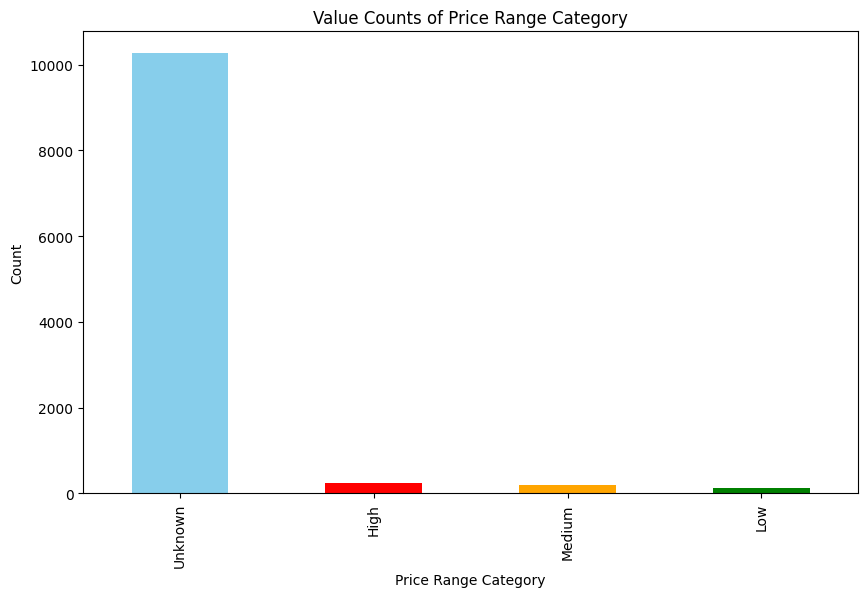

In [219]:
value_counts = df['Price_Range_Category'].value_counts().head(9)

colors = ['skyblue', 'red', 'orange', 'green']

plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color=colors)
plt.title('Value Counts of Price Range Category')
plt.xlabel('Price Range Category')
plt.ylabel('Count')
plt.show()

**one-hot encoding for make Tesla**

we do not need these steps from here on, just for Feature Engineering knowledge
    

In [207]:
# Perform one-hot encoding on the 'Make' column
df_encoded = pd.get_dummies(df, columns=['Make'])

# Filter rows with make=Tesla
tesla_df = df_encoded[df_encoded['Make_TESLA'] == 1]

# Set other makes as 'Fuels'
tesla_df['Make_FUELS'] = 0

<ipython-input-207-8684a12bc304>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Add Vehicle Efficiency Rating column**

In [208]:
# Normalize the Electric Range for Tesla vehicles
tesla_df['Normalized Range'] = tesla_df['Electric Range'] / tesla_df['Electric Range'].max()

# Calculate Efficiency Rating for Tesla vehicles
tesla_df['Efficiency'] = tesla_df['Normalized Range'] * 100

# Display the updated Data for Tesla vehicles
print(tesla_df)

        VIN (1-10)  Model Year    Model           Electric Vehicle Type  \
0       5YJYGDEE1L        2020  MODEL Y  Battery Electric Vehicle (BEV)   
1       7SAYGDEE9P        2023  MODEL Y  Battery Electric Vehicle (BEV)   
2       5YJSA1E4XK        2019  MODEL S  Battery Electric Vehicle (BEV)   
3       5YJSA1E27G        2016  MODEL S  Battery Electric Vehicle (BEV)   
4       5YJYGDEE5M        2021  MODEL Y  Battery Electric Vehicle (BEV)   
...            ...         ...      ...                             ...   
168935  5YJSA1DG7D        2013  MODEL S  Battery Electric Vehicle (BEV)   
170379  5YJXCDE42H        2017  MODEL X  Battery Electric Vehicle (BEV)   
171237  5YJSA1DG3D        2013  MODEL S  Battery Electric Vehicle (BEV)   
171292  5YJXCDE49K        2019  MODEL X  Battery Electric Vehicle (BEV)   
172768  5YJSA1CP7C        2012  MODEL S  Battery Electric Vehicle (BEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0                 Clea

<ipython-input-208-37ad8acc9aa8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-208-37ad8acc9aa8>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



**Plotting the histogram of Vehicle Efficiency Rating**

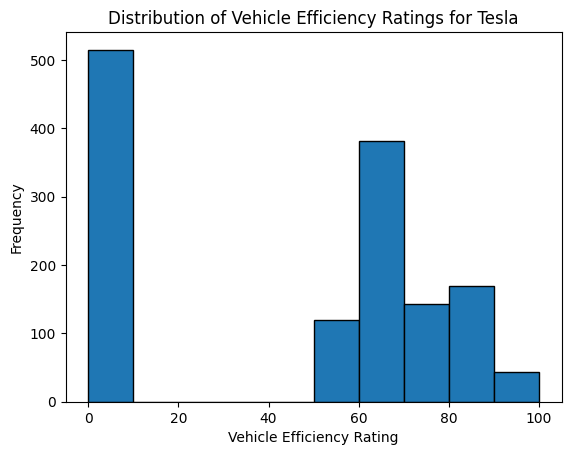

In [209]:
# Visualize efficiency of Tesla vehicles
plt.hist(tesla_df['Efficiency'], bins=10, edgecolor='black')
plt.xlabel('Vehicle Efficiency Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Vehicle Efficiency Ratings for Tesla')
plt.show()

**Print highest Tesla vehicles efficiency rating**

In [210]:
max_efficiency = tesla_df['Efficiency'].max()
max_efficiency_rows = tesla_df[tesla_df['Efficiency'] == max_efficiency]

for index, row in max_efficiency_rows.iterrows():
    print("Model Type:", row['Model'])
    print("Model Year:", row['Model Year'])
    print()

Model Type: MODEL S
Model Year: 2020

Model Type: MODEL S
Model Year: 2020

Model Type: MODEL S
Model Year: 2020

Model Type: MODEL S
Model Year: 2020

Model Type: MODEL S
Model Year: 2020

Model Type: MODEL S
Model Year: 2020

Model Type: MODEL S
Model Year: 2020

Model Type: MODEL S
Model Year: 2020

Model Type: MODEL S
Model Year: 2020

Model Type: MODEL S
Model Year: 2020

Model Type: MODEL S
Model Year: 2020

